In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('/content/Houses.csv')

In [5]:
df.shape

(1460, 81)

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.drop(['Id'], axis=1, inplace=True)

In [10]:
dtype = pd.DataFrame(df.dtypes, columns=['dtypes']).T

In [11]:
for column in df.columns:
  if df[column].dtype == object:
    df[column] = df[column].astype('category')
df.dtypes

,0
MSSubClass,int64
MSZoning,category
LotFrontage,float64
LotArea,int64
Street,category
...,...
MoSold,int64
YrSold,int64
SaleType,category
SaleCondition,category


In [12]:
cat_col = []
num_col = []
for x in df.columns:
  if df[x].dtype == 'category':
    cat_col.append(x)
  elif df[x].dtype == 'int64' or df[x].dtype == 'float64' :
    num_col.append(x)

In [13]:
df.dtypes

,0
MSSubClass,int64
MSZoning,category
LotFrontage,float64
LotArea,int64
Street,category
...,...
MoSold,int64
YrSold,int64
SaleType,category
SaleCondition,category


In [14]:
df[cat_col].nunique()

,0
MSZoning,5
Street,2
Alley,2
LotShape,4
LandContour,4
Utilities,2
LotConfig,5
LandSlope,3
Neighborhood,25
Condition1,9


In [15]:
null = pd.DataFrame(df.isnull().sum()/df.shape[0])

In [16]:
null[null[0]>0.2]

,0
Alley,0.937671
MasVnrType,0.597260
FireplaceQu,0.472603
PoolQC,0.995205
Fence,0.807534
MiscFeature,0.963014


In [17]:
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1, inplace=True)

In [18]:
cat_col = []
num_col = []
for x in df.columns:
  if df[x].dtype == 'category':
    cat_col.append(x)
  elif df[x].dtype == 'int64' or df[x].dtype == 'float64' :
    num_col.append(x)

In [19]:
if cat_col:
    mode_values = df[cat_col].mode().iloc[0]
    df[cat_col] = df[cat_col].fillna(mode_values)

In [20]:
for col in num_col:
  mean = df[col].mean()
  median = df[col].median()
  mode = df[col].mode()[0]

  if mean > median:
    df[col].fillna(df[col].median(), inplace=True)
  elif mean < median:
    df[col].fillna(df[col].median(), inplace=True)
  else:
    df[col].fillna(df[col].mean(), inplace=True)


<ipython-input-20-f32d5de2b275>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-20-f32d5de2b275>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [21]:
for col in cat_col:
  df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-21-f17572500eb6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [22]:
len(num_col)

37

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

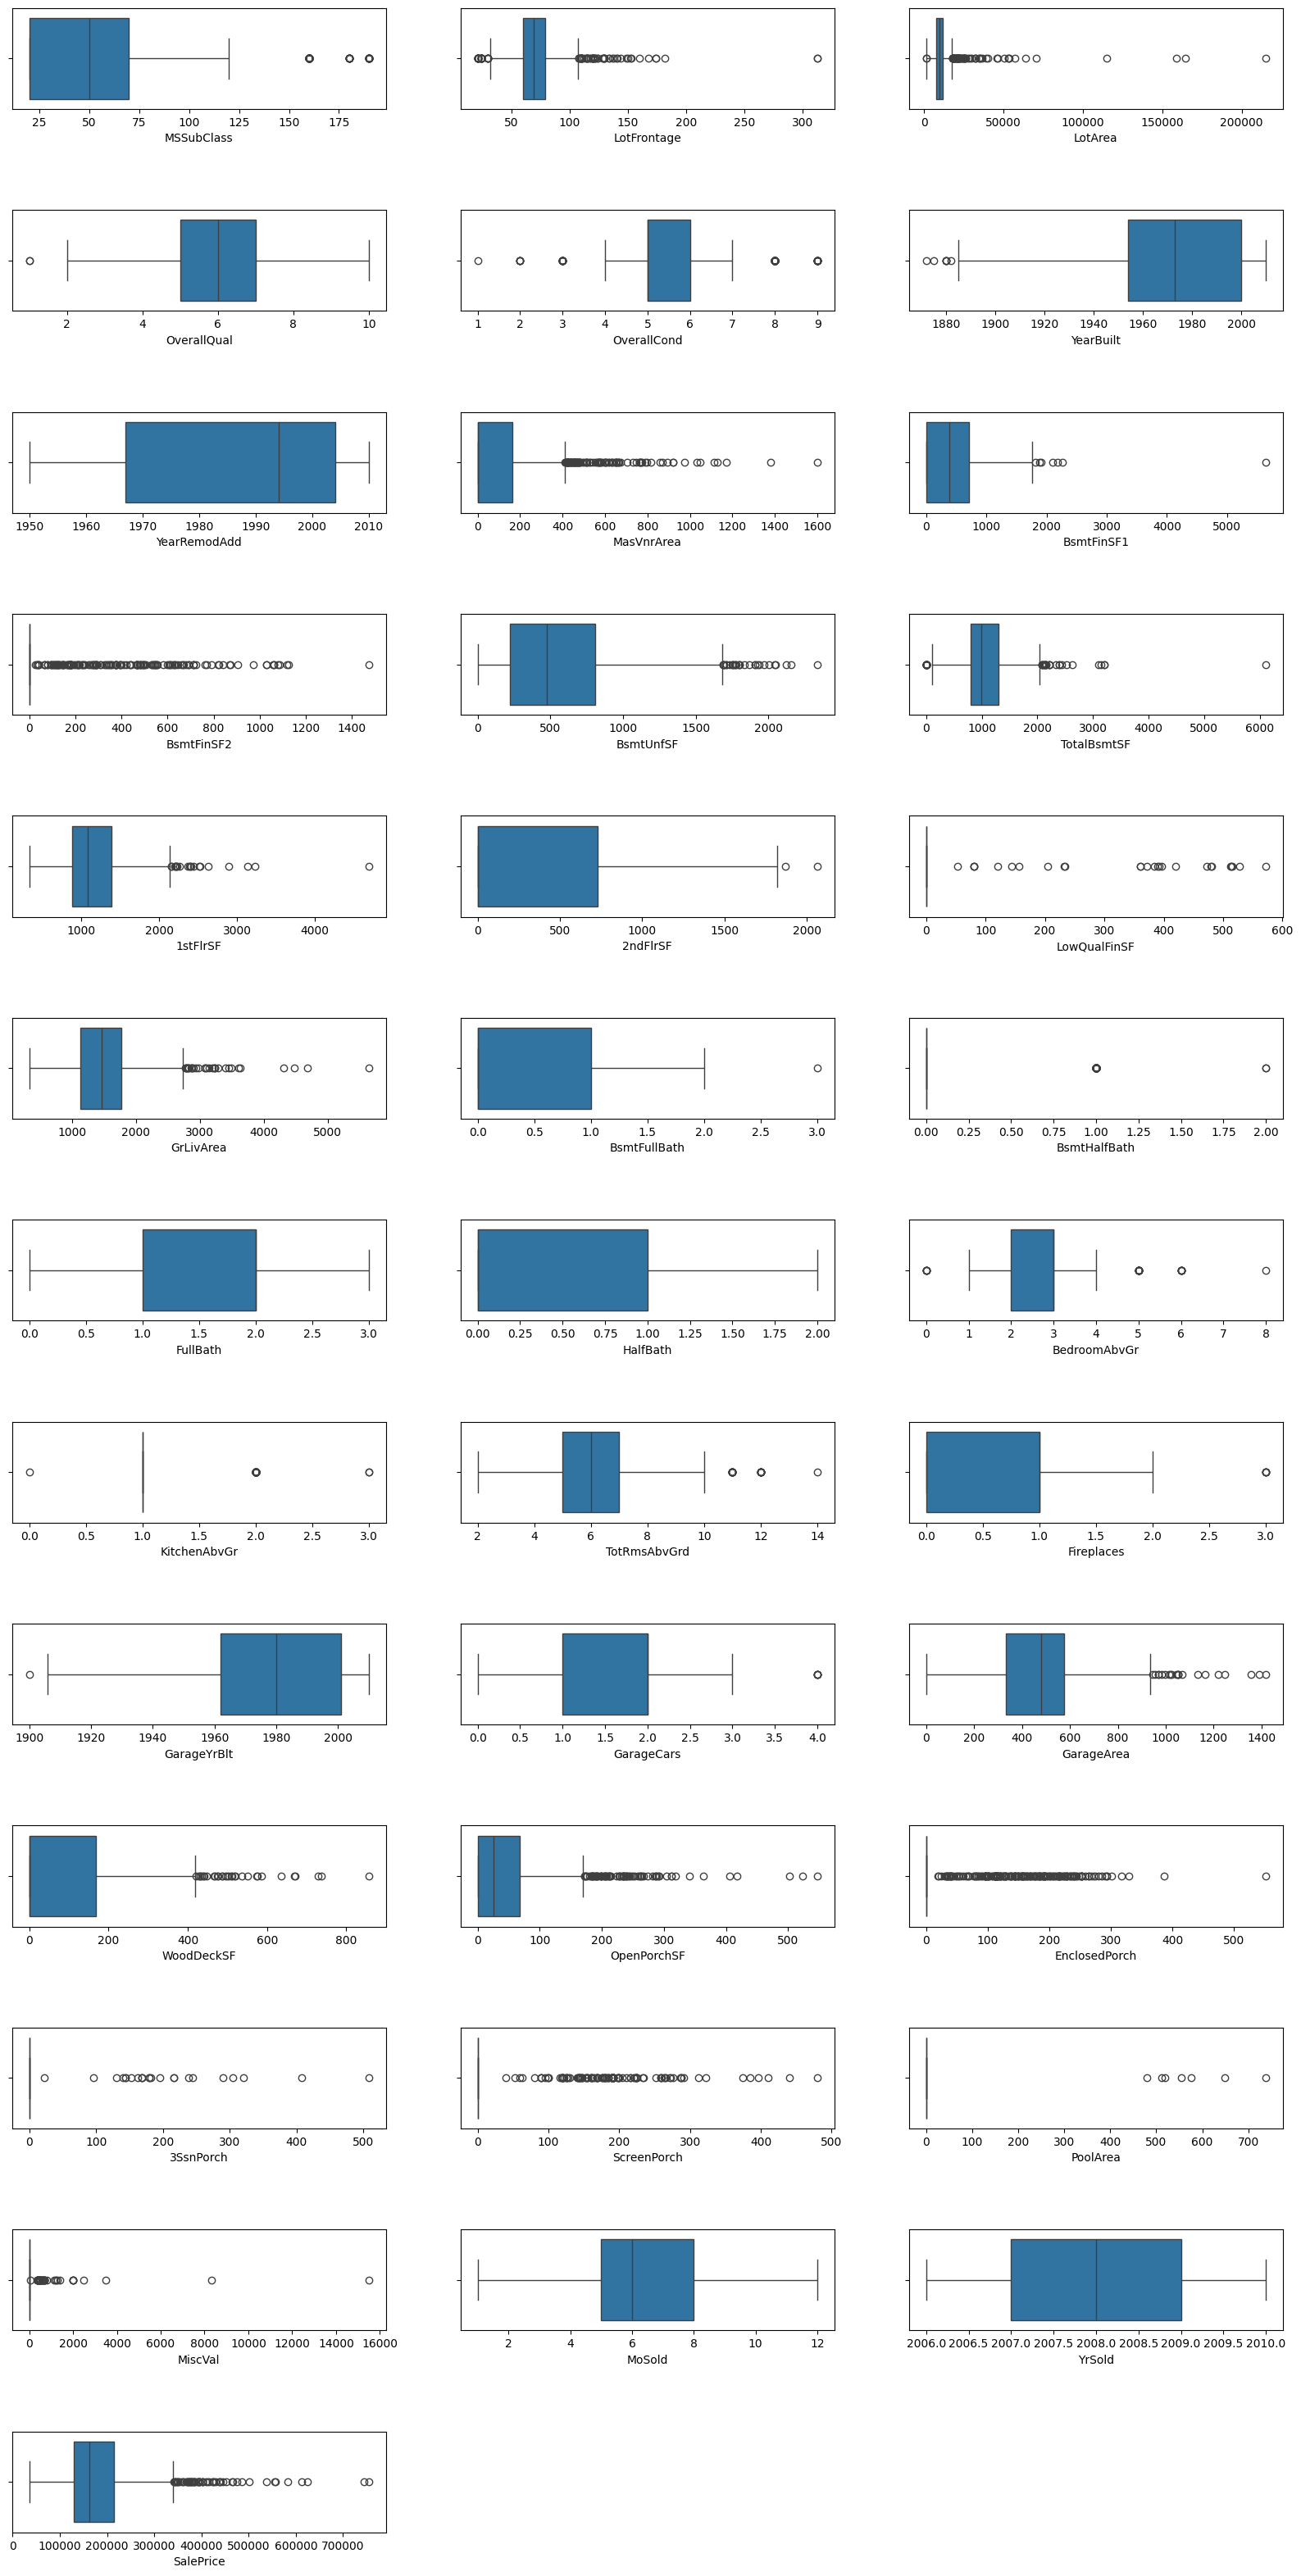

In [23]:
plt.figure(figsize=(20,40))
for i,col in enumerate(num_col):
  plt.subplot(13, 3, i+1)
  sns.boxplot(x = df[col])
plt.subplots_adjust(hspace=1)
plt.show()

In [24]:
def detect_outliers_iqr(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return lower_bound, upper_bound

for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        lower_bound, upper_bound = detect_outliers_iqr(df[column])
        for value in df[column]:
            if value < lower_bound:
                df[column] = df[column].replace(value, lower_bound)
            elif value > upper_bound:
                df[column] = df[column].replace(value, upper_bound)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

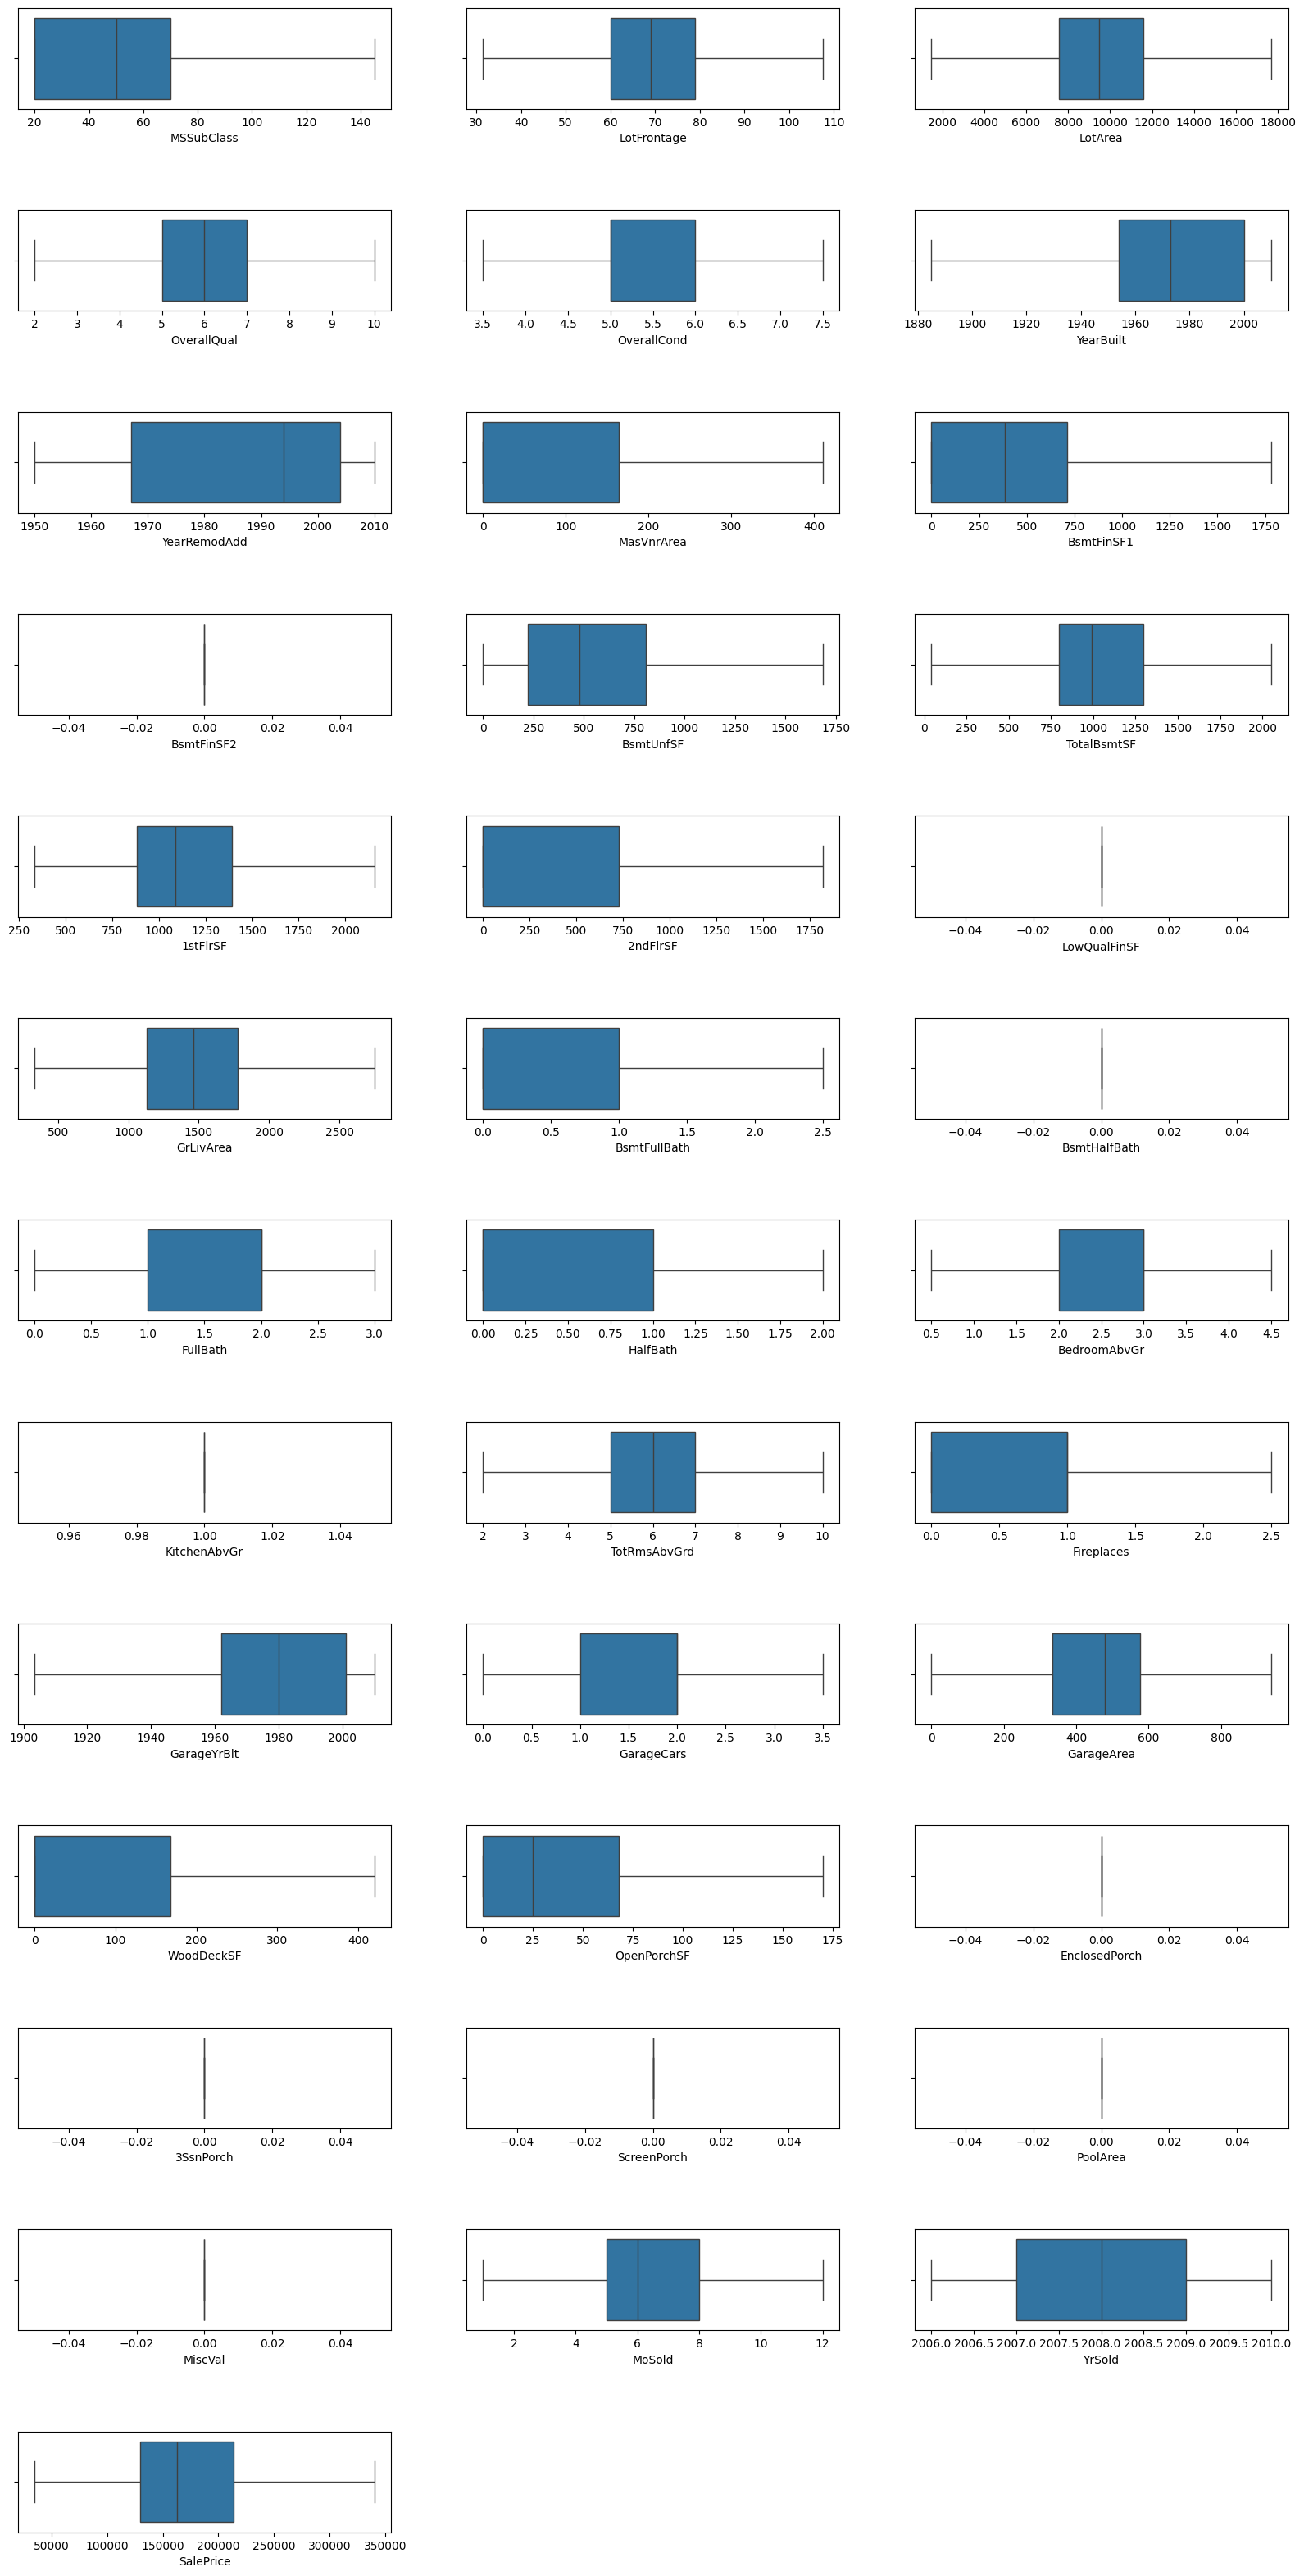

In [25]:
plt.figure(figsize=(20,40))
for i,col in enumerate(num_col):
  plt.subplot(13, 3, i+1)
  sns.boxplot(x = df[col])
plt.subplots_adjust(hspace=1)
plt.show()

In [26]:
len(cat_col)

38

In [27]:
df.duplicated().sum()

0

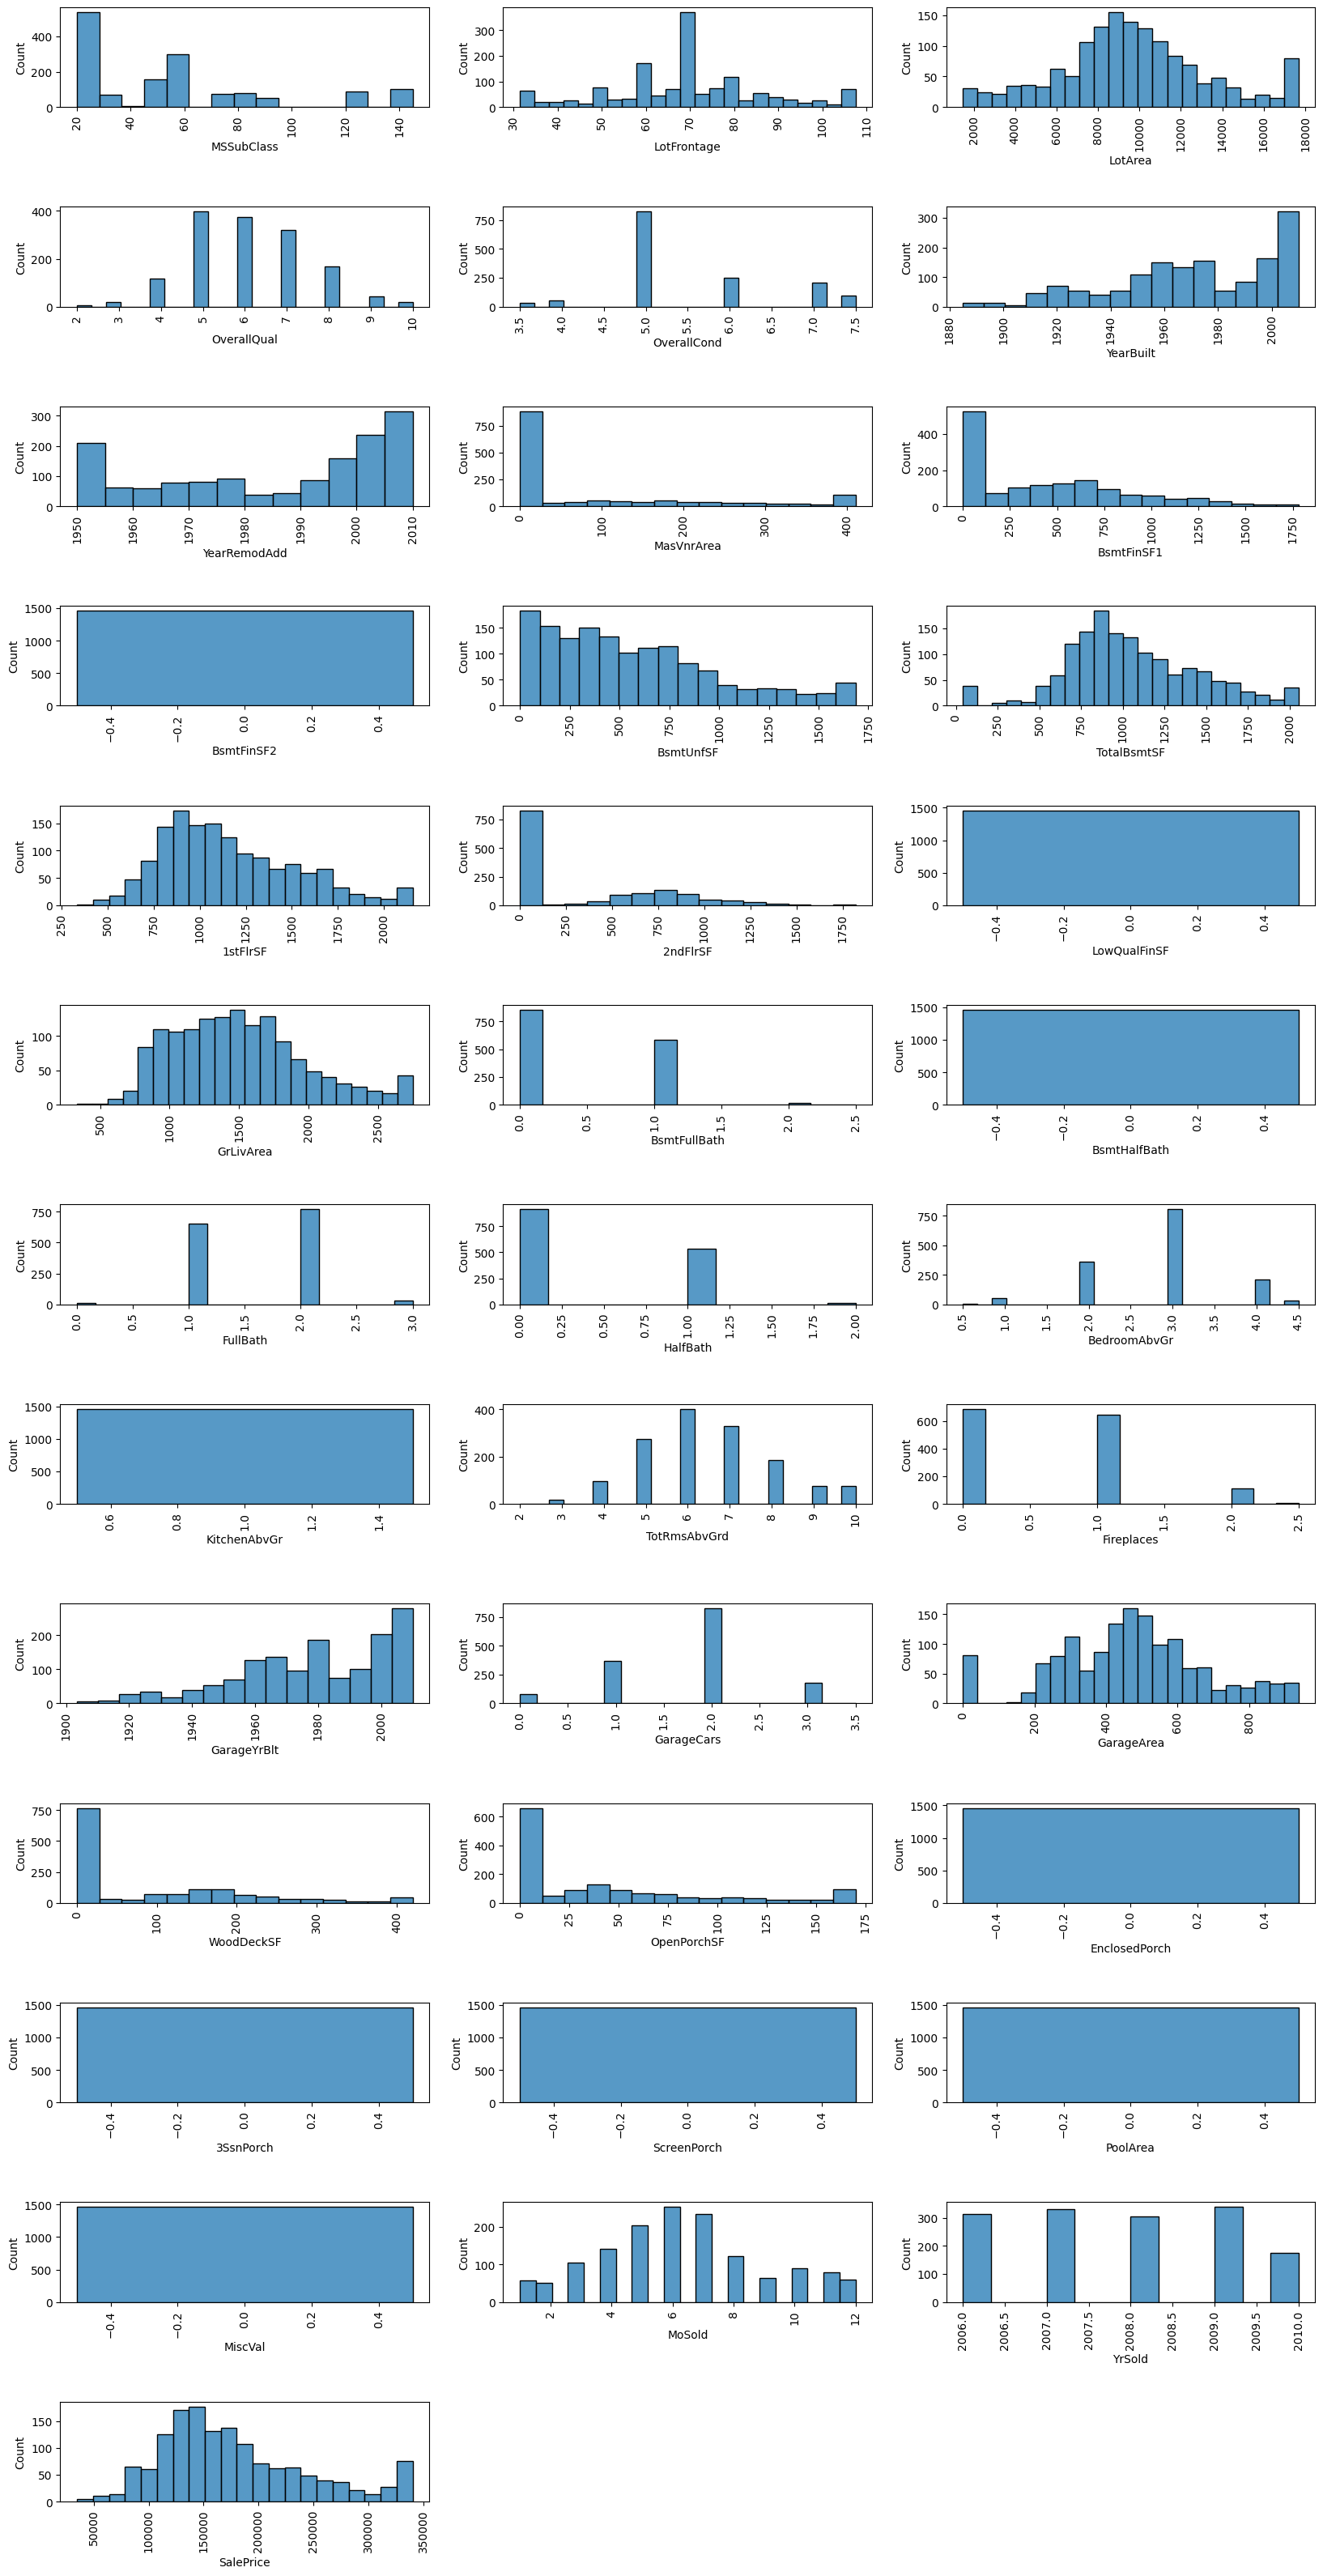

In [28]:
plt.figure(figsize=(20,40))
for i,col in enumerate(num_col):
  plt.subplot(13, 3, i+1)
  sns.histplot(x = df[col])
  plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)
plt.show()

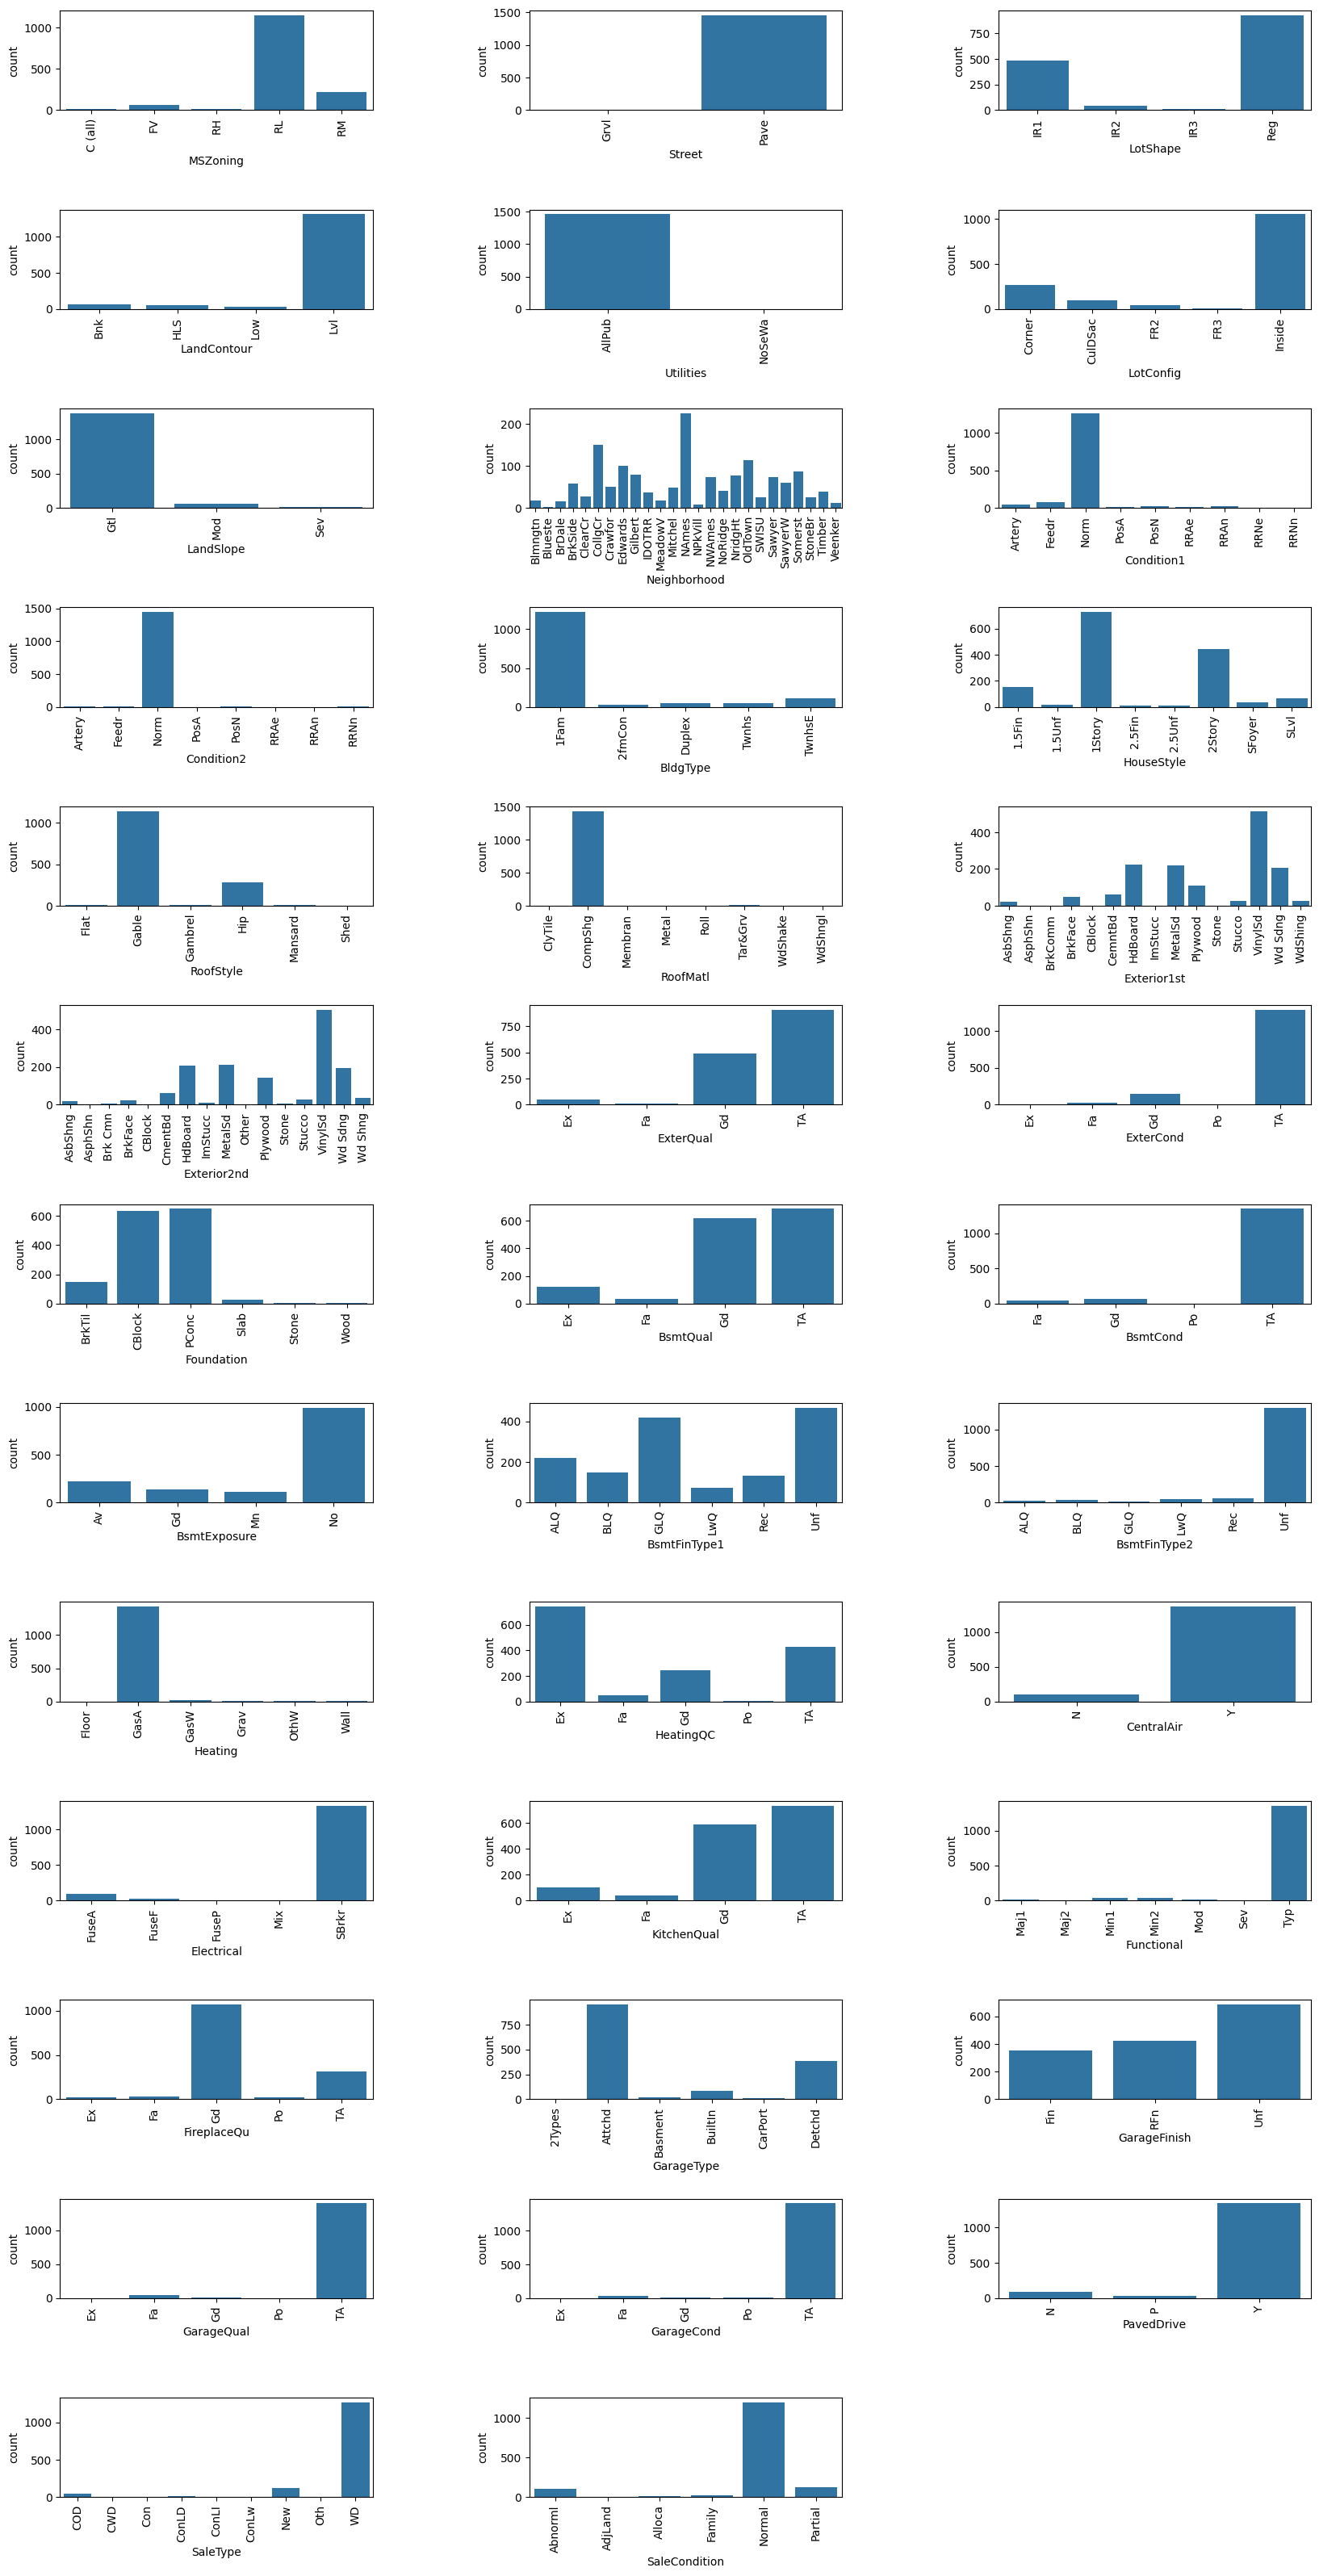

In [29]:
plt.figure(figsize=(20,40))
for i,col in enumerate(cat_col):
  plt.subplot(13, 3, i+1)
  sns.countplot(x = df[col])
  plt.xlabel(col)
  plt.xticks(rotation=90)
plt.subplots_adjust(wspace = 0.5, hspace=1)
plt.show()

In [31]:
low_var = []
for col in num_col:
  if col in df.columns:
    if df[col].var() < 0.8:
      low_var.append(col)

In [32]:
x = df.drop('SalePrice', axis=1)
y = df[['SalePrice']]

In [33]:
import pandas as pd
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for col in cat_col:
  if x[col].nunique() > 10:
    encoder = BinaryEncoder()
    encoded_data = encoder.fit_transform(x[col])
    x = pd.concat([x.drop(col, axis=1), encoded_data], axis=1)
  elif 3 <= x[col].nunique() <= 6:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_data = encoder.fit_transform(x[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=[f"{col}_{i}" for i in range(encoded_data.shape[1])])
    x = pd.concat([x.drop(col, axis=1), encoded_df], axis=1)
  else:
    encoder = LabelEncoder()
    x[col] = encoder.fit_transform(x[col])


In [34]:
x

,MSSubClass,LotFrontage,LotArea,Street,Utilities,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,...,GarageCond_4,PavedDrive_0,PavedDrive_1,PavedDrive_2,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,60,65.0,8450.0,1,0,2,2,5,7,5.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600.0,1,0,1,2,2,6,7.5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250.0,1,0,2,2,5,7,5.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550.0,1,0,2,2,5,7,5.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260.0,1,0,2,2,5,8,5.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917.0,1,0,2,2,5,6,5.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,20,85.0,13175.0,1,0,2,2,2,6,6.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,70,66.0,9042.0,1,0,2,2,5,7,7.5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,20,68.0,9717.0,1,0,2,2,2,5,6.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
model.score(x_train, y_train)

0.9163379107796142

In [41]:
model.score(x_test, y_test)

0.9163379107796142